Error during processing: Could not read the image: D:./111.png


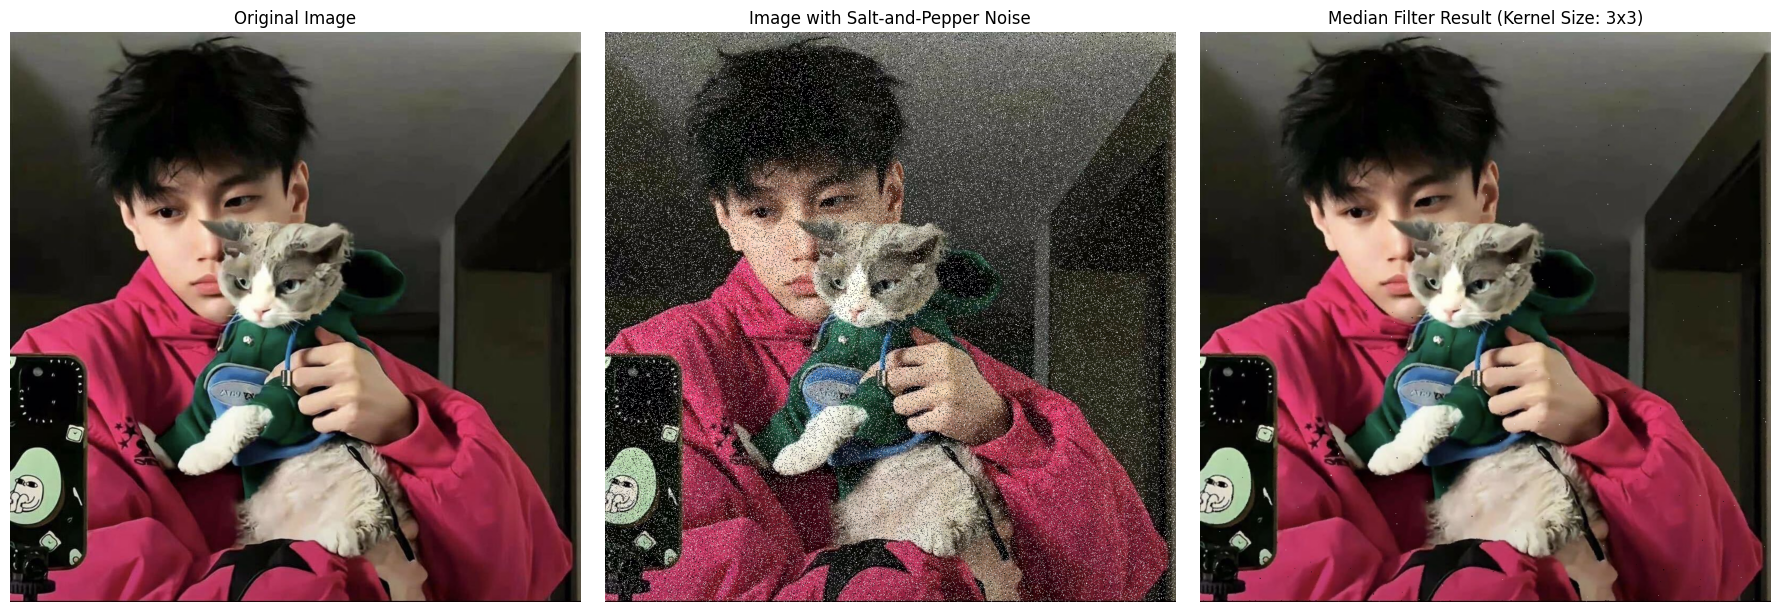

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """Load an image and convert to RGB format (OpenCV reads images in BGR by default)"""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not read the image: {image_path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def add_salt_pepper_noise(image, prob=0.05):
    """
    Add salt-and-pepper noise to the image (simulates real noise scenarios to test median filtering)
    :param image: Input image (RGB format)
    :param prob: Noise probability (0~1; higher values mean more noise)
    :return: Noise-contaminated image
    """
    output = np.copy(image)
    # Split probability for salt and pepper noise (50% each)
    salt_prob = prob / 2
    pepper_prob = prob / 2

    # Generate random masks to determine which pixels get noise
    num_salt = np.ceil(salt_prob * image.size)  # Number of salt noise pixels
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    output[coords[0], coords[1], :] = 255  # Salt noise (white, RGB=255)

    num_pepper = np.ceil(pepper_prob * image.size)  # Number of pepper noise pixels
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    output[coords[0], coords[1], :] = 0  # Pepper noise (black, RGB=0)

    return output


def median_filter(image, kernel_size=3):
    """
    Median Filter (non-linear filter, ideal for removing salt-and-pepper noise)
    :param image: Input image (may contain noise, RGB format)
    :param kernel_size: Size of the kernel (must be odd, e.g., 3,5,7; larger = stronger filtering)
    :return: Filtered image
    """
    # Use OpenCV's built-in median filtering function (efficient implementation)
    # Principle: Replace each pixel with the median value of its neighborhood
    median_result = cv2.medianBlur(image, ksize=kernel_size)
    return median_result


def show_median_results(original, noisy, filtered, kernel_size):
    """Display original image, noisy image, and median filter result"""
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    # Image with salt-and-pepper noise
    plt.subplot(1, 3, 2)
    plt.imshow(noisy)
    plt.title("Image with Salt-and-Pepper Noise")
    plt.axis("off")

    # Median filter result
    plt.subplot(1, 3, 3)
    plt.imshow(filtered)
    plt.title(f"Median Filter Result (Kernel Size: {kernel_size}x{kernel_size})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Replace with your image path (supports .jpg, .png, etc.)
    image_path = r"111.png"  # Use a raw string to avoid path escape issues
    kernel_size = 3  # Median filter kernel size (must be odd, e.g., 3,5,7)
    noise_prob = 0.05  # Salt-and-pepper noise probability (0.05 = 5% of pixels contaminated)

    try:
        # Load original image
        original = load_image(image_path)

        # Add salt-and-pepper noise (to test median filter performance)
        noisy_image = add_salt_pepper_noise(original, prob=noise_prob)

        # Apply median filter
        filtered_image = median_filter(noisy_image, kernel_size=kernel_size)

        # Show comparison results
        show_median_results(original, noisy_image, filtered_image, kernel_size)

    except Exception as e:
        print(f"Error during processing: {e}")